# Get sigma_density for all stars

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from astropy.stats import sigma_clip
from scipy.stats import cumfreq
from scipy import stats

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
rho = np.loadtxt('rho_neg_vals_included_asymmetric_logg43_1787stars.csv', delimiter=',')
mass = np.loadtxt('mass_neg_vals_included_asymmetric_logg43_1787stars.csv', delimiter=',')
radius = np.loadtxt('rad_neg_vals_included_asymmetric_logg43_1787stars.csv', delimiter=',')

# Create a CDF

Working with mass[4] and radius[4] to begin with

https://stackoverflow.com/questions/3209362/how-to-plot-empirical-cdf-in-matplotlib-in-python

In [6]:
def get_cdf(dist, nbins=100):
    counts, bin_edges = np.histogram(dist, bins=nbins, range=(np.min(dist), np.max(dist)))
    cdf = np.cumsum(counts)
    cdf = cdf/np.max(cdf)
    return bin_edges[1:], cdf

In [7]:
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(np.where(array == array[idx])[0])

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if len(np.where(array == array[idx])[0]) == 1:
        return int(np.where(array == array[idx])[0])
    else:
        return int(np.where(array == array[idx])[0][0])

In [8]:
def find_sigma(x, cdf, sign):
    med = x[find_nearest_index(cdf, 0.5)]
    if sign == "-":
        sigma = x[find_nearest_index(cdf, 0.16)] - med
    elif sign == "+":
        sigma = x[find_nearest_index(cdf, 0.84)] - med
    return sigma

Text(0.5, 0, 'Density (Sol Density) (One star)')

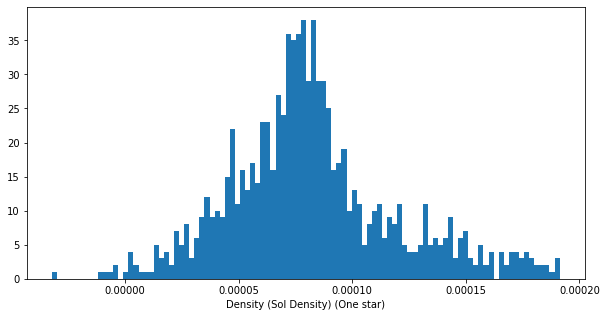

In [9]:
rho_t = sigma_clip(rho[4])
plt.hist(rho_t, bins=100);
plt.xlabel('Density (Sol Density) (One star)')

In [10]:
#return x array, distribution cdf
x, cdf = get_cdf(rho_t)

(0, 1)

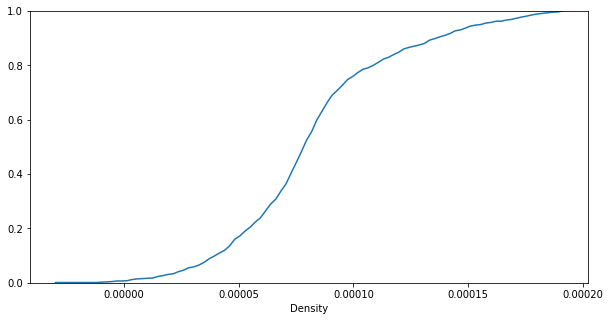

In [11]:
plt.plot(x, cdf)
plt.xlabel("Density")
plt.ylim(0,1)

This uses the median and not the mode (it should use the mode)

Text(0.5, 0, 'Density')

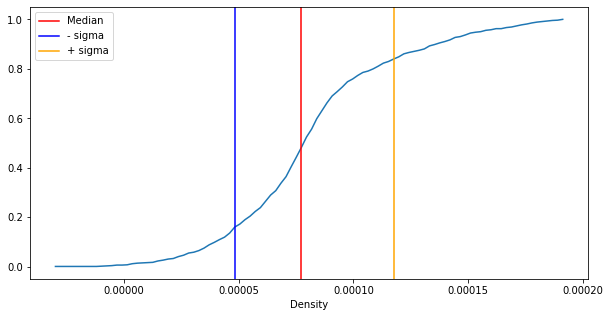

In [12]:
plt.plot(x, cdf)
plt.axvline(x=x[find_nearest_index(cdf, 0.5)], c='r', label='Median')
plt.axvline(x=x[find_nearest_index(cdf, 0.5)]+find_sigma(x, cdf, "-"), c='blue', label='- sigma')
plt.axvline(x=x[find_nearest_index(cdf, 0.5)]+find_sigma(x, cdf, "+"), c='orange', label='+ sigma')
plt.legend()
plt.xlabel('Density')

In [13]:
print(find_sigma(x, cdf, "-"))
print(find_sigma(x, cdf, "+"))

-2.9024925042110503e-05
4.0188357750614535e-05


Checked find_sigma with mass distribution (input sigma + and sigma - from Kepler). It's accurate.

In [14]:
def find_sigmas_allstars(arr):

    sigma_minus = np.zeros((len(arr)))
    sigma_plus = np.zeros((len(arr)))
    xs = np.zeros((len(arr), 100))
    cdfs = np.zeros((len(arr), 100))
    
    for i in range(len(arr)):
        arr_t = sigma_clip(arr[i])
        sigma_minus[i] = find_sigma(get_cdf(arr_t)[0], get_cdf(arr_t)[1], "-")
        sigma_plus[i] = find_sigma(get_cdf(arr_t)[0], get_cdf(arr_t)[1], "+")
        xs[i] = get_cdf(arr_t)[0]
        cdfs[i] = get_cdf(arr_t)[1]
        
        
    return sigma_minus, sigma_plus, xs, cdfs

In [15]:
sig_minus, sig_plus, xs, cdfs = find_sigmas_allstars(rho)

Text(0.5, 0, 'Sigma minus')

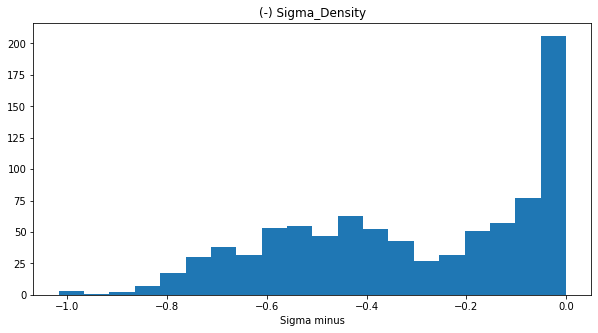

In [16]:
plt.hist(sigma_clip(sig_minus), bins=20);
plt.title("(-) Sigma_Density")
plt.xlabel('Sigma minus')

Text(0.5, 0, 'Sigma')

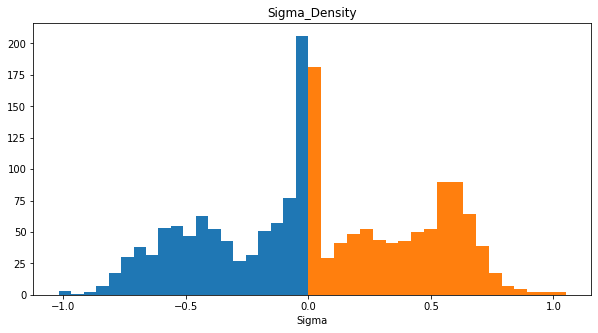

In [36]:
plt.hist(sigma_clip(sig_minus), bins=20);
plt.hist(sigma_clip(sig_plus), bins=20);
plt.title("Sigma_Density")
plt.xlabel("Sigma")

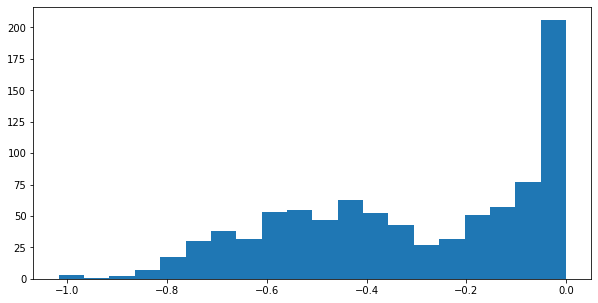

In [18]:
plt.hist(sigma_clip(sig_minus), bins=20);

In [19]:
print(sig_plus[2])

0.00030768300736112386


In [20]:
print(sig_minus[2])

-0.00010256100245370817


(array([  3.,   6.,  11.,  21.,  26.,  49.,  82.,  90., 106., 606.]),
 array([-3.15488658, -2.44592533, -1.73696409, -1.02800285, -0.31904161,
         0.38991964,  1.09888088,  1.80784212,  2.51680336,  3.22576461,
         3.93472585]),
 <a list of 10 Patch objects>)

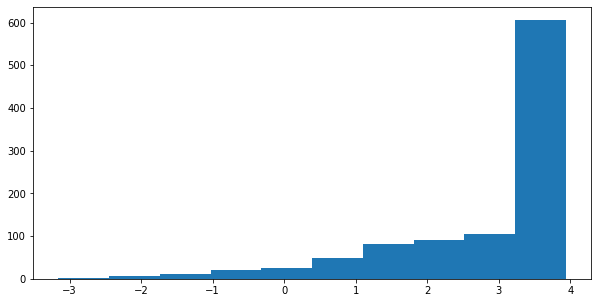

In [21]:
plt.hist(mass[2])

(array([  2.,   2.,  10.,  21.,  31.,  54.,  72.,  99., 132., 577.]),
 array([-7.05889389, -3.57867775, -0.0984616 ,  3.38175454,  6.86197068,
        10.34218682, 13.82240296, 17.30261911, 20.78283525, 24.26305139,
        27.74326753]),
 <a list of 10 Patch objects>)

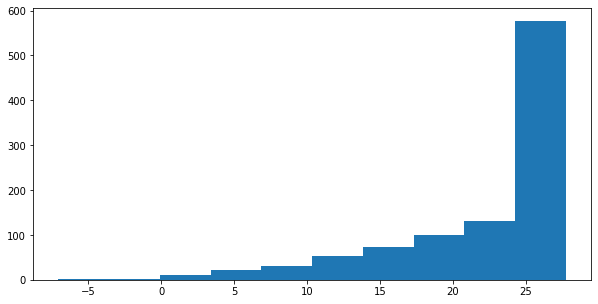

In [22]:
plt.hist(radius[2])

(array([816.,  58.,  20.,  11.,   4.,   3.,   4.,   3.,   2.,   1.,   0.,
          1.,   2.,   3.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
        0.018, 0.019, 0.02 ]),
 <a list of 20 Patch objects>)

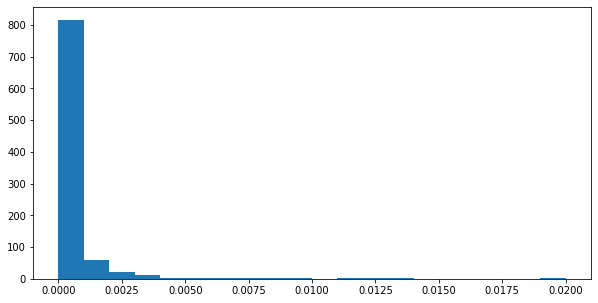

In [23]:
plt.hist(mass[2]/radius[2]**3, range=(0,0.02), bins=20)

In [24]:
rho_meds = np.median(rho, axis=1)
mass_meds = np.median(mass, axis=1)
rad_meds = np.median(radius, axis=1)

# Sigma (-) vs. Density

Median: -0.31419035980205046
Mean: -0.3611165296268135


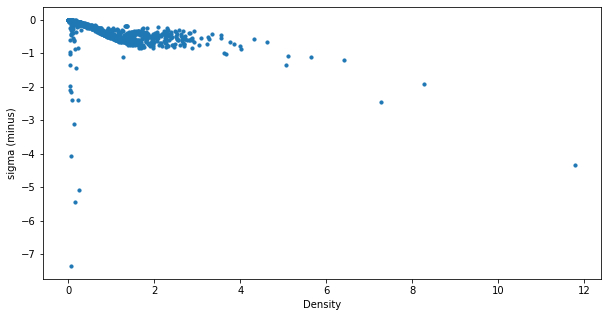

In [25]:
plt.scatter(rho_meds, sig_minus, s=10);
plt.xlabel('Density')
plt.ylabel('sigma (minus)')
print('Median: ' + str(np.median(sig_minus)))
print('Mean: ' + str(np.mean(sig_minus)))

# Sigma (+) vs. Density

Median: 0.3888363909034255
Mean: 0.3947943221610419


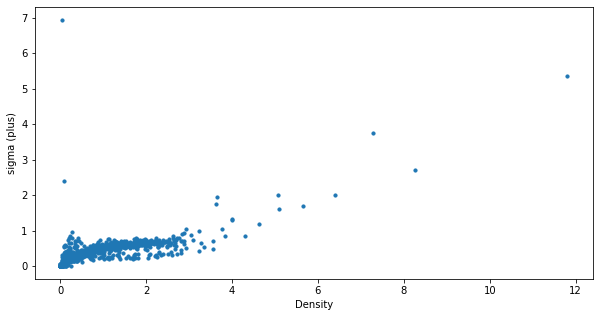

In [26]:
plt.scatter(rho_meds, sig_plus, s=10);
plt.xlabel('Density')
plt.ylabel('sigma (plus)')
print('Median: ' + str(np.median(sig_plus)))
print('Mean: ' + str(np.mean(sig_plus)))

# Sigma (+) vs. Mass

Text(0, 0.5, 'sigma (plus)')

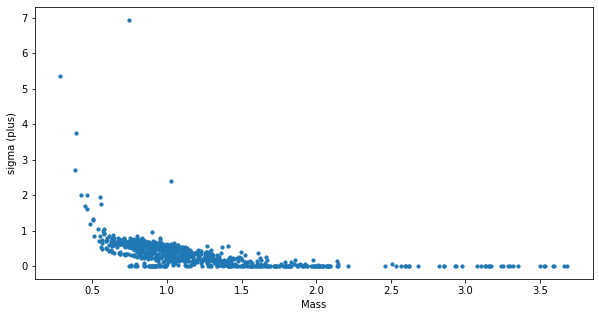

In [27]:
plt.scatter(mass_meds, sig_plus, s=10);
plt.xlabel('Mass')
plt.ylabel('sigma (plus)')

# Sigma (+) vs. Radius

(0, 2)

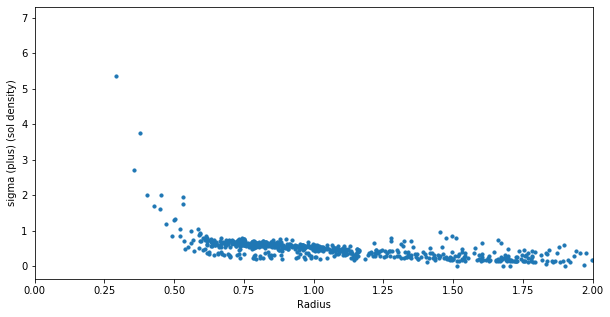

In [28]:
plt.scatter(rad_meds, sig_plus, s=10);
plt.xlabel('Radius')
plt.ylabel('sigma (plus) (sol density)')
plt.xlim(0,2)

Text(0, 0.5, 'Density')

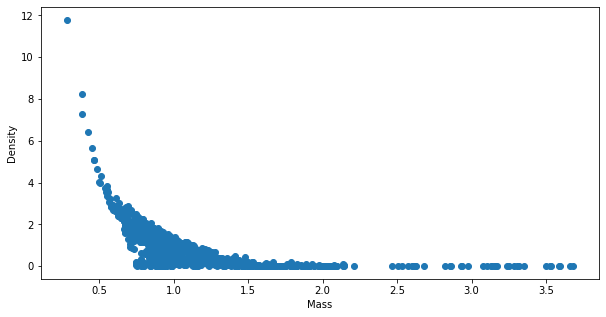

In [29]:
plt.scatter(mass_meds, rho_meds)
plt.xlabel('Mass')
plt.ylabel('Density')

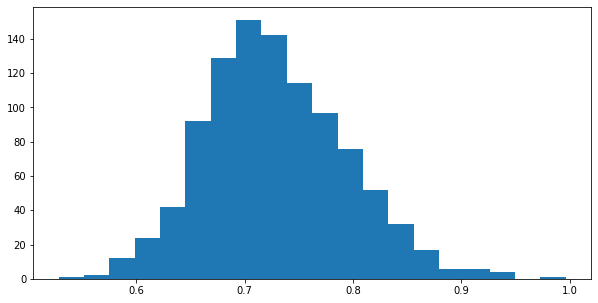

In [30]:
plt.hist(radius[6],bins=20);

In [31]:
rad_meds[0:100]

array([ 0.84353331,  1.10496293, 26.08899646,  1.6450341 , 28.39290118,
        1.62867562,  0.72109733,  0.78980429,  0.79458241,  1.1230384 ,
        0.96190655,  0.95771692,  0.73683774,  1.4742447 ,  0.92064568,
       11.12493848,  0.74478847,  1.01498716,  0.86343326,  1.70287   ,
        0.77457534,  0.80794837,  0.64730357,  8.66610879,  1.11814095,
        0.86313337,  2.06434194,  0.99023185, 11.6928445 , 14.8289032 ,
        0.83625671,  0.76740416,  2.51294217,  7.82336604, 15.31803973,
        2.03044052,  1.69773595,  1.9175082 , 21.51517103,  0.7659266 ,
        0.74791743,  8.79888226,  1.45244718,  0.75161867,  3.51369999,
        1.06582995,  1.35710889,  0.93403803,  0.99910447,  1.26279649,
        1.47686672,  1.36838668,  9.04777368,  1.60031009,  1.75315683,
        0.64599426,  1.4964339 ,  1.51020411, 16.30347119,  1.02145174,
        0.84063825,  0.78020632,  5.14169298,  2.15667276,  0.90880115,
        2.06438664,  1.72734386,  1.02933188,  0.8898233 ,  0.75

Text(0, 0.5, 'Density')

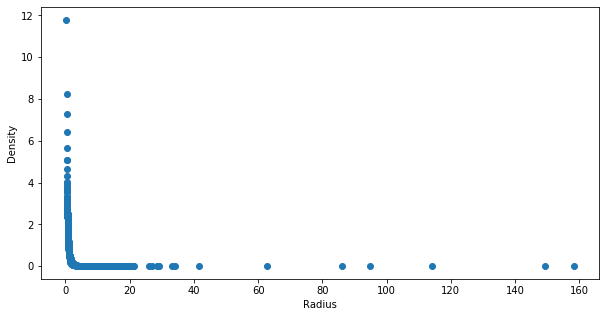

In [32]:
plt.scatter(rad_meds, rho_meds)
plt.xlabel('Radius')
plt.ylabel('Density')

##### Mass vs Radii

(array([  9.,  14.,  28.,  63., 101., 139., 165., 365., 101.,  15.]),
 array([-0.23497201,  0.0601397 ,  0.35525141,  0.65036312,  0.94547482,
         1.24058653,  1.53569824,  1.83080995,  2.12592166,  2.42103336,
         2.71614507]),
 <a list of 10 Patch objects>)

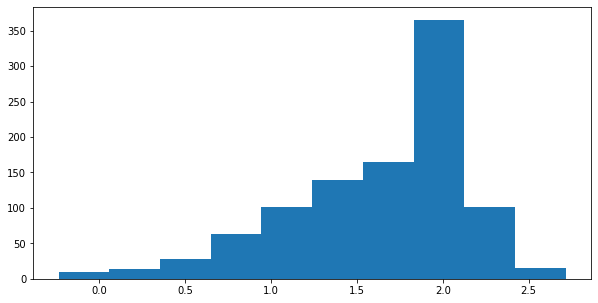

In [33]:
plt.hist(mass[4])

(array([  4.,   5.,  16.,  33.,  43.,  90., 125., 112., 434., 138.]),
 array([10.53345099, 12.64534973, 14.75724846, 16.8691472 , 18.98104594,
        21.09294467, 23.20484341, 25.31674215, 27.42864089, 29.54053962,
        31.65243836]),
 <a list of 10 Patch objects>)

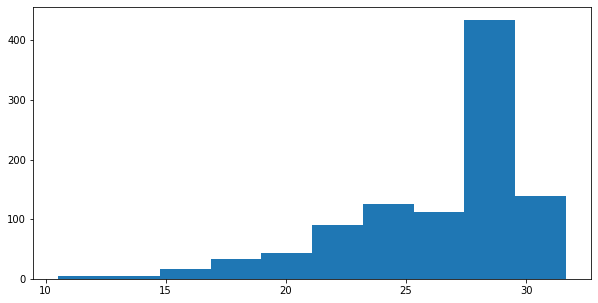

In [34]:
plt.hist(radius[4])

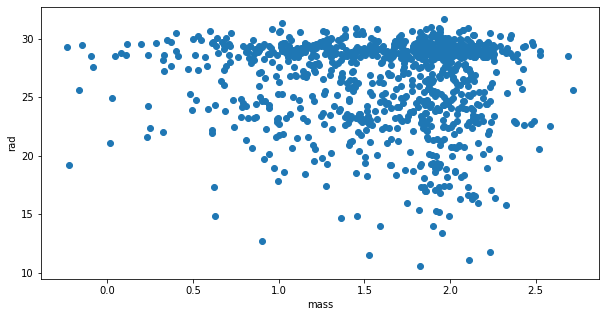

In [35]:
plt.scatter(mass[4], radius[4]);
plt.xlabel('mass')
plt.ylabel('rad')

rho4 = mass[4]/((4/3)*np.pi*radius[4]**3)


high_density = np.where(rho[4] > 1.7)
plt.scatter(mass[4][high_density], radius[4][high_density])